In [1]:
import os

import numpy as np
np.set_printoptions(precision=2)
import torch
import matplotlib.pyplot as plt

from bmadx import Particle
from bmadx.plot import plot_projections

from stats import (
    read_all_particles,
    show_cov_stats,
    plot_projections_with_contours
)

In [2]:
dr = os.path.join('data', 'gaussian_beam', 'stats_t_2')

In [3]:
gt = torch.load(os.path.join(dr, 'gaussian_beam.pt')).numpy_particles()

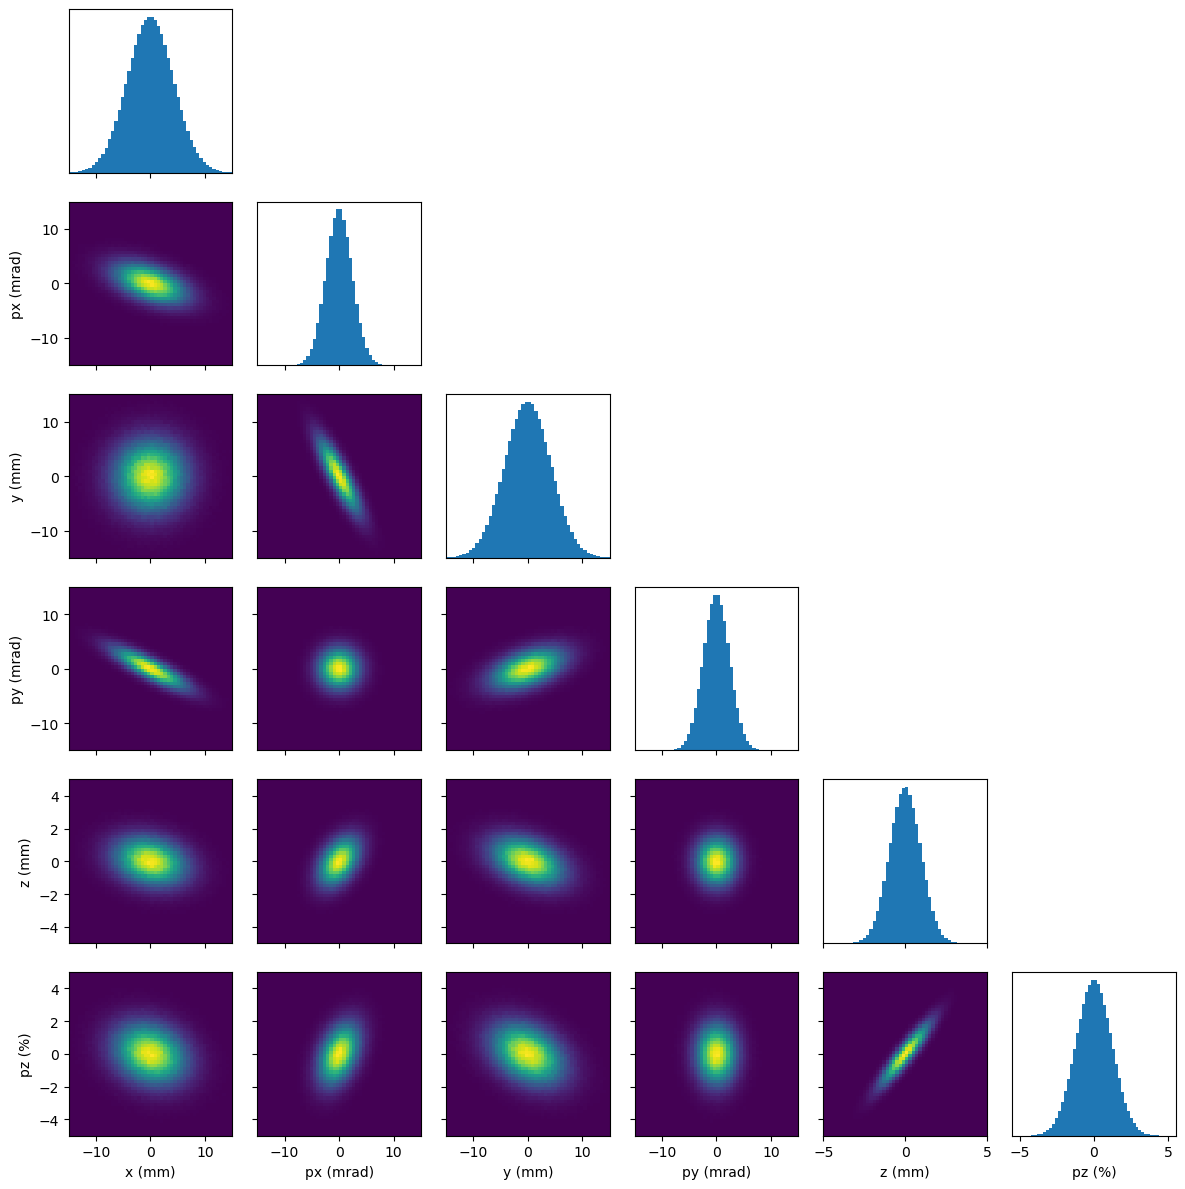

In [4]:
# plot gt:
lims = np.array([
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-15e-3,15e-3],
    [-5e-3,5e-3],
    [-5e-2,5e-2]
])
plot_projections(gt, custom_lims=lims)
plt.show()

In [5]:
n_beams = 10
n_par = 100_000

pars = read_all_particles(
    dr = dr,
    n_beams = n_beams, 
    n_par = n_par
)

In [6]:
par_concat = np.swapaxes(pars, 0, 1).reshape((6, n_par*n_beams))

In [7]:
r_avg = Particle(
    *par_concat,
    p0c = gt.p0c,
    s = gt.s,
    mc2 = gt.mc2
)

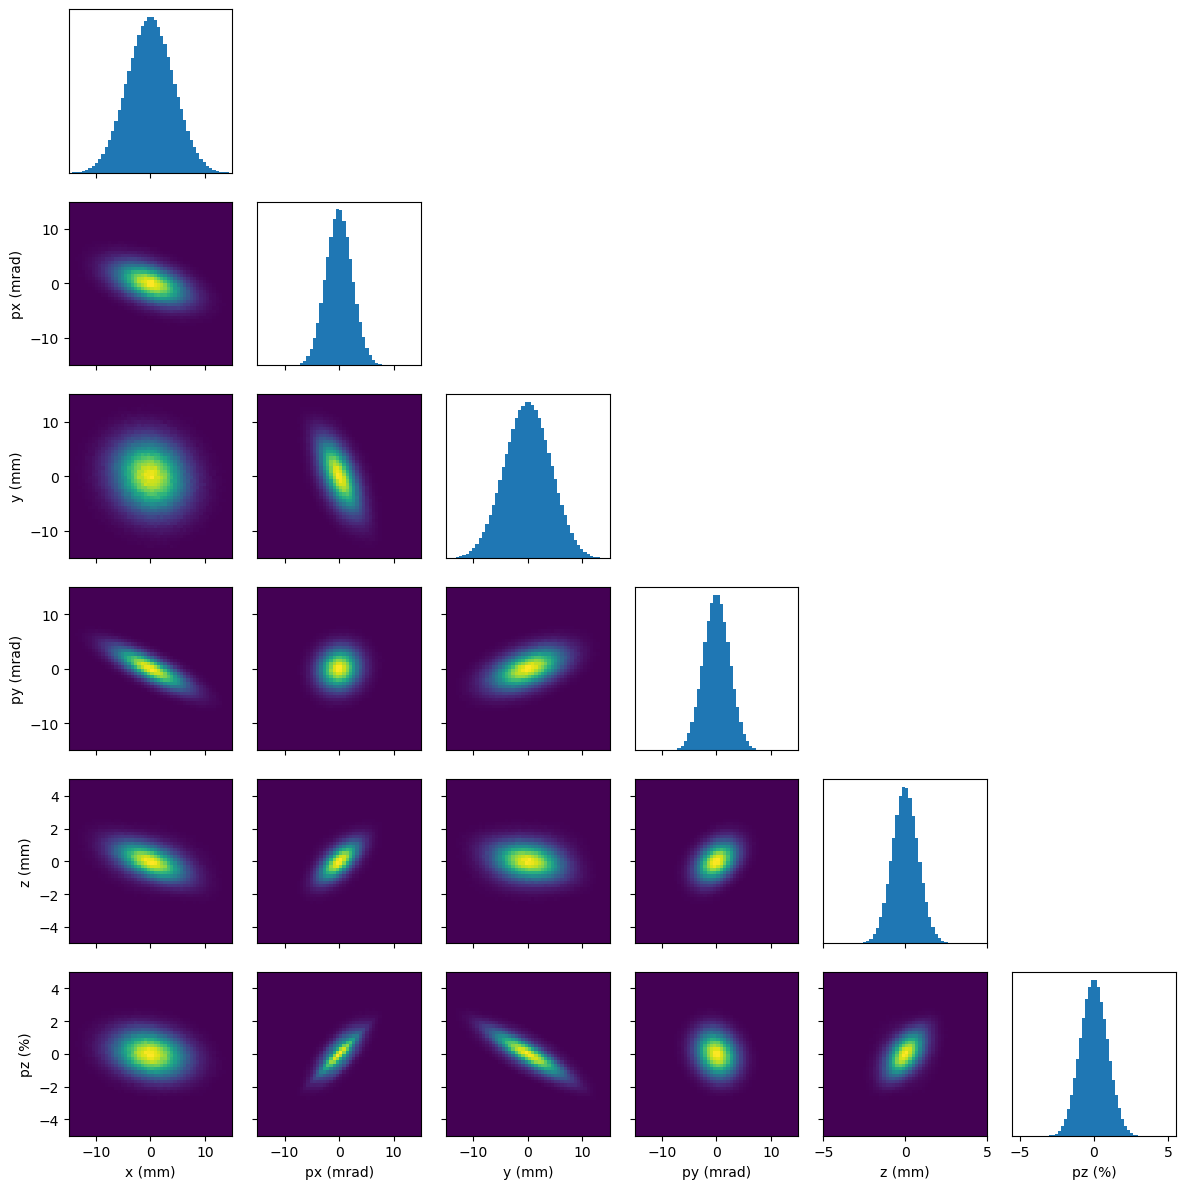

In [8]:
plot_projections(r_avg, custom_lims=lims)
plt.show()

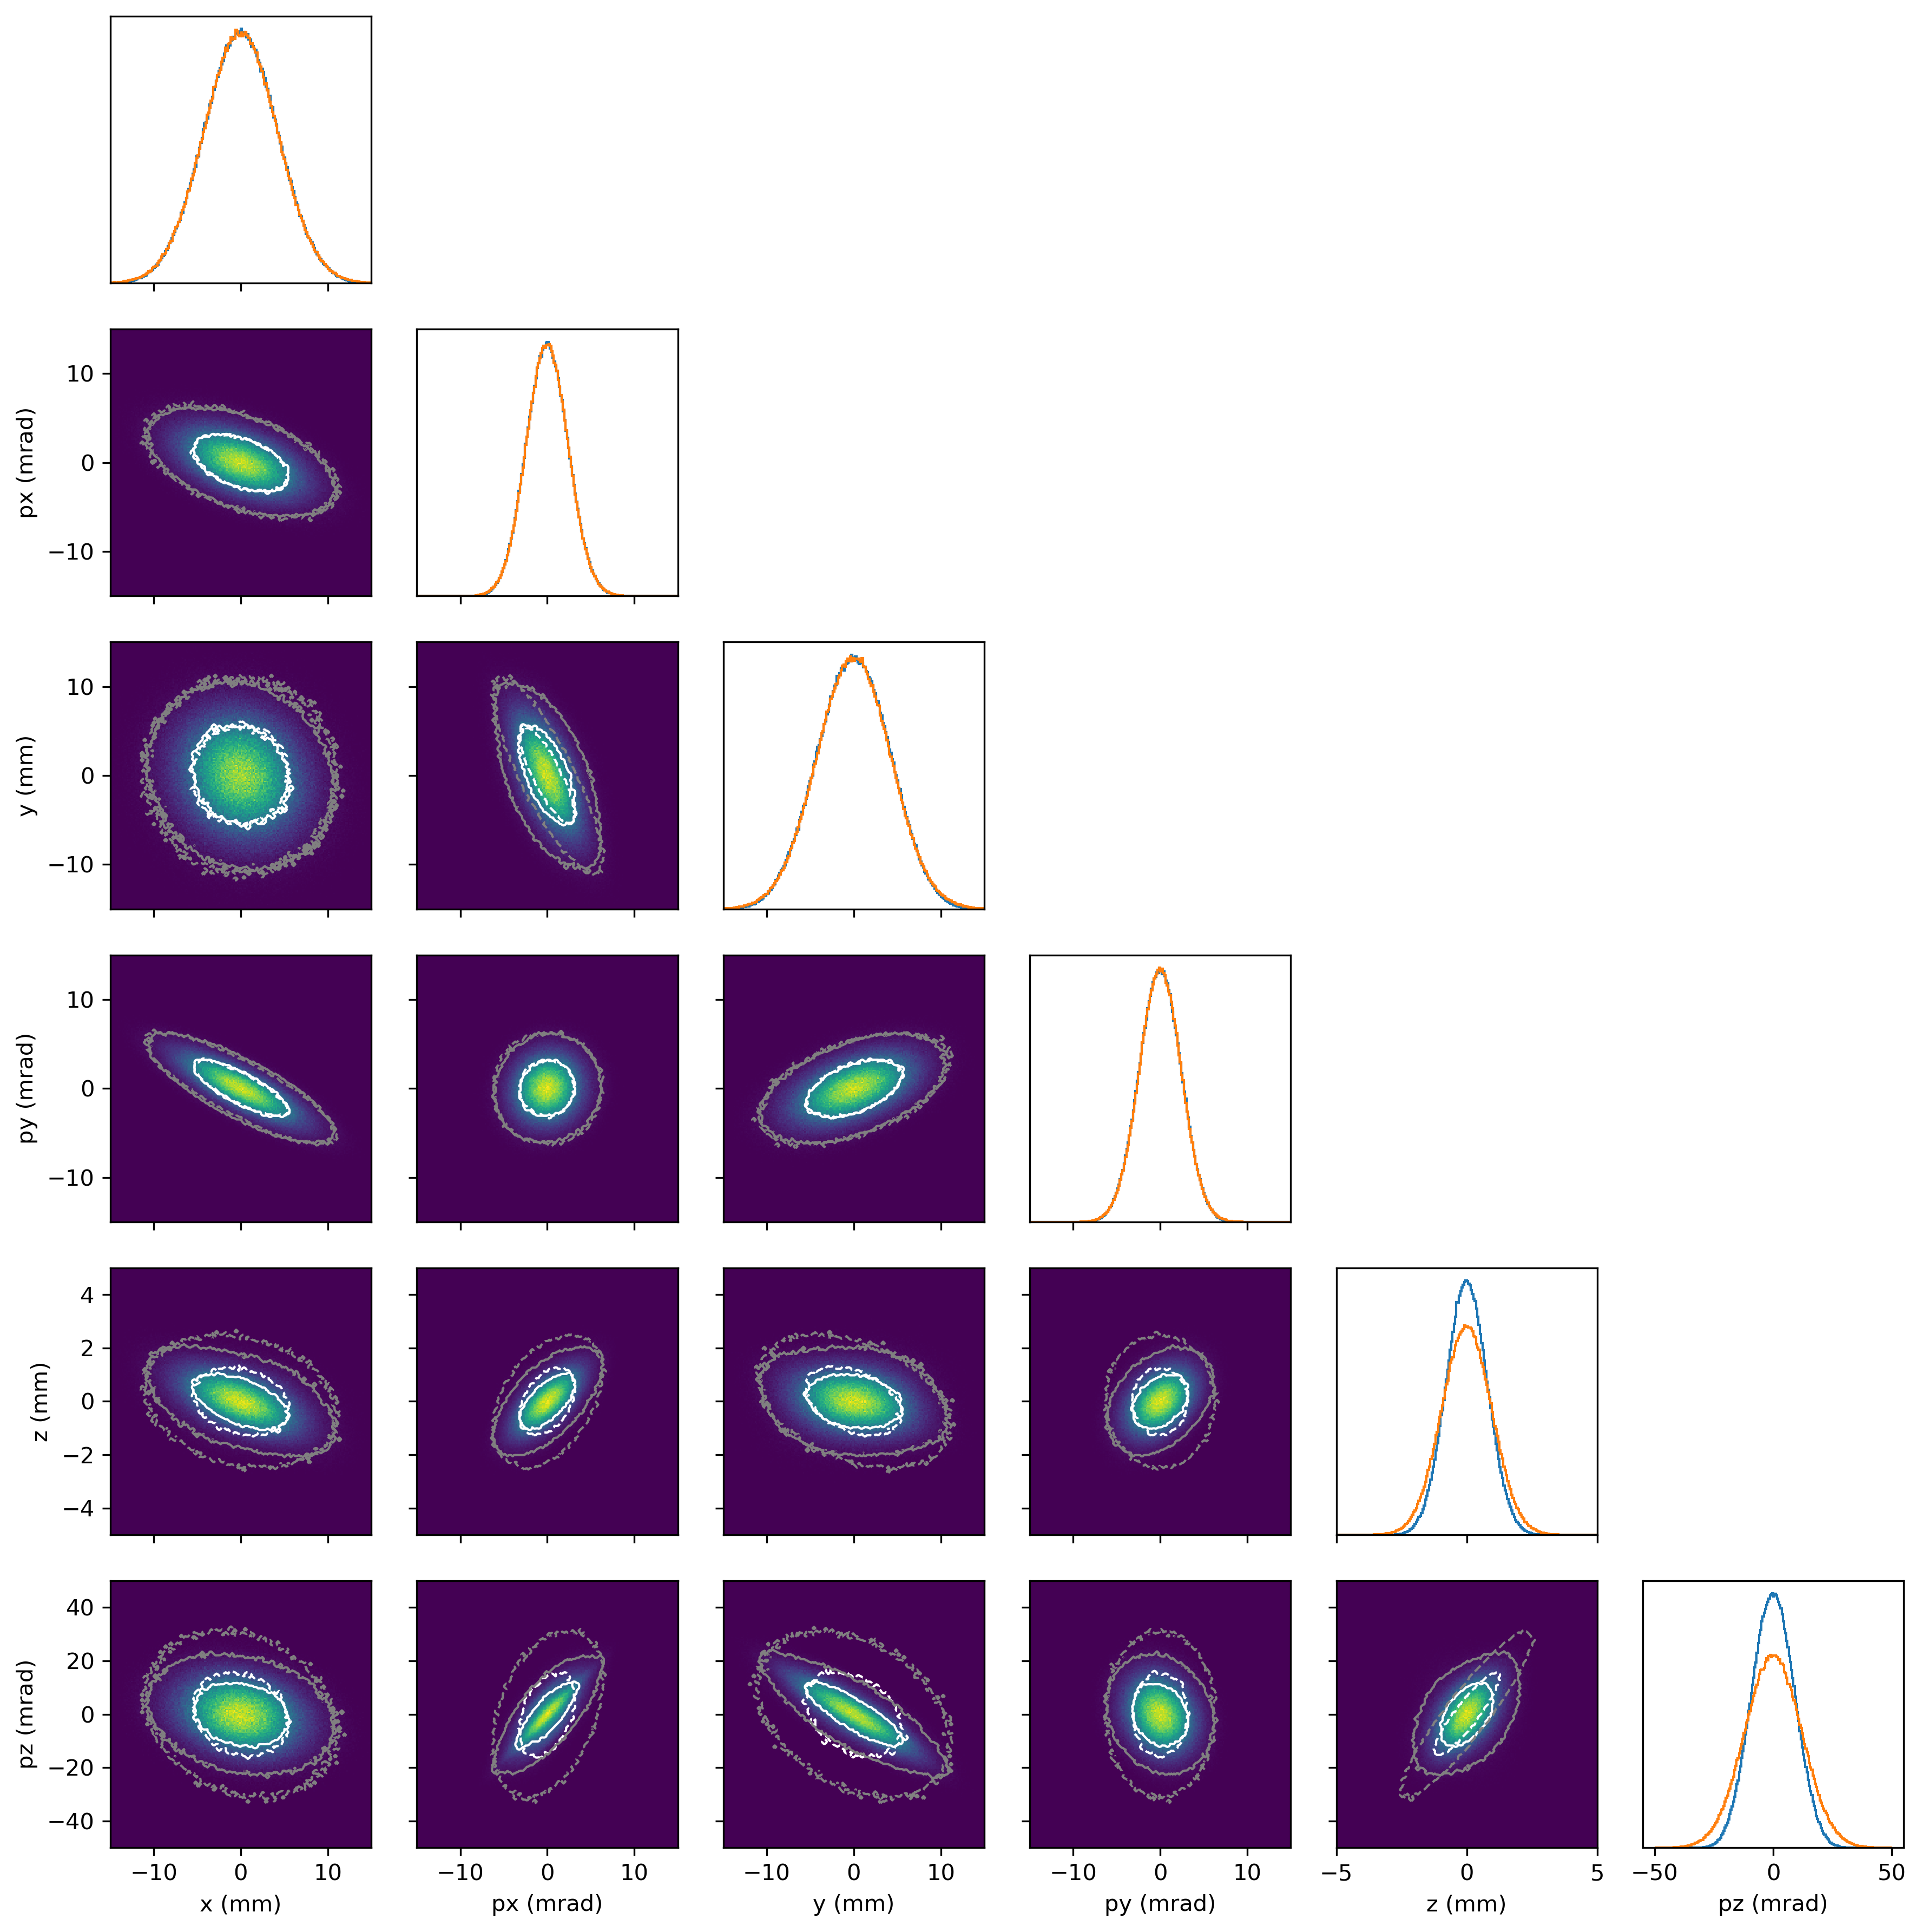

In [9]:
plot_projections_with_contours(
    r_avg,
    gt,
    bins=200,
    contour_percentiles = [50, 95],
    custom_lims=lims,
    contour_smoothing_r=0.5,
    contour_smoothing_gt=0.5
)
plt.show()

ground truth: 
[[ 1.01e+01 -2.79e+00 -1.62e-02 -4.85e+00 -4.89e-01 -5.65e+00]
 [-2.79e+00  3.23e+00 -4.85e+00 -4.42e-03  5.47e-01  6.31e+00]
 [-1.62e-02 -4.85e+00  1.01e+01  2.81e+00 -8.53e-01 -9.85e+00]
 [-4.85e+00 -4.42e-03  2.81e+00  3.24e+00 -1.56e-03 -1.73e-02]
 [-4.89e-01  5.47e-01 -8.53e-01 -1.56e-03  5.11e-01  5.89e+00]
 [-5.65e+00  6.31e+00 -9.85e+00 -1.73e-02  5.89e+00  7.98e+01]]

reconstruction avg: 
[[ 10.77  -2.88  -1.74  -5.04  -0.97  -4.02]
 [ -2.88   3.33  -3.36   0.29   0.71   9.21]
 [ -1.74  -3.36  10.8    3.2   -0.34 -18.99]
 [ -5.04   0.29   3.2    3.59   0.43  -2.48]
 [ -0.97   0.71  -0.34   0.43   0.37   1.85]
 [ -4.02   9.21 -18.99  -2.48   1.85  49.58]]

reconstruction std: 
[[0.68 0.21 0.92 0.47 0.4  2.74]
 [0.21 0.16 1.19 0.25 0.14 1.34]
 [0.92 1.19 0.51 0.3  0.54 2.51]
 [0.47 0.25 0.3  0.27 0.15 1.06]
 [0.4  0.14 0.54 0.15 0.05 1.  ]
 [2.74 1.34 2.51 1.06 1.   8.95]]

reconstruction relative uncertainty: 
[[ 0.06 -0.07 -0.53 -0.09 -0.42 -0.68]
 [-0.07  0.05 

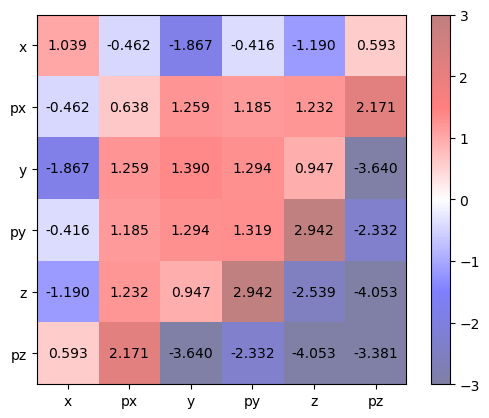

In [10]:
show_cov_stats(pars, gt, beam_fraction=0.5)

ground truth: 
[[ 1.65e+01 -4.60e+00  6.82e-03 -7.96e+00 -8.06e-01 -9.31e+00]
 [-4.60e+00  5.31e+00 -7.95e+00  3.93e-03  8.97e-01  1.03e+01]
 [ 6.82e-03 -7.95e+00  1.65e+01  4.58e+00 -1.40e+00 -1.61e+01]
 [-7.96e+00  3.93e-03  4.58e+00  5.31e+00 -7.37e-04  4.19e-03]
 [-8.06e-01  8.97e-01 -1.40e+00 -7.37e-04  8.39e-01  9.67e+00]
 [-9.31e+00  1.03e+01 -1.61e+01  4.19e-03  9.67e+00  1.31e+02]]

reconstruction avg: 
[[ 16.47  -4.52  -2.21  -7.6   -1.5   -6.73]
 [ -4.52   5.28  -5.39   0.41   1.11  14.87]
 [ -2.21  -5.39  16.19   4.61  -0.56 -28.98]
 [ -7.6    0.41   4.61   5.37   0.65  -3.49]
 [ -1.5    1.11  -0.56   0.65   0.58   2.93]
 [ -6.73  14.87 -28.98  -3.49   2.93  73.59]]

reconstruction std: 
[[ 0.29  0.15  1.29  0.35  0.68  4.5 ]
 [ 0.15  0.1   1.66  0.32  0.21  1.87]
 [ 1.29  1.66  0.41  0.2   0.81  3.35]
 [ 0.35  0.32  0.2   0.13  0.21  1.19]
 [ 0.68  0.21  0.81  0.21  0.09  1.56]
 [ 4.5   1.87  3.35  1.19  1.56 10.04]]

reconstruction relative uncertainty: 
[[ 0.02 -0.03 -0.

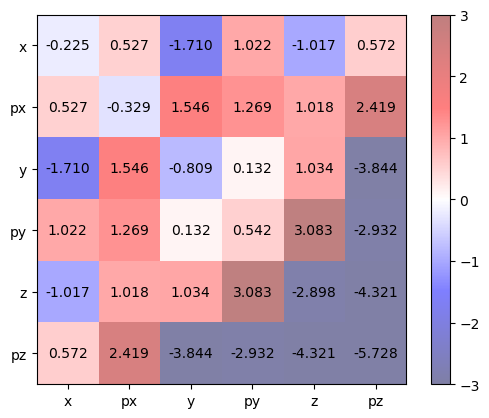

In [11]:
show_cov_stats(pars, gt, beam_fraction=0.95)

ground truth: 
[[ 18.01  -5.01   0.01  -8.67  -0.88 -10.13]
 [ -5.01   5.78  -8.66   0.01   0.98  11.25]
 [  0.01  -8.66  17.99   4.99  -1.52 -17.54]
 [ -8.67   0.01   4.99   5.78  -0.     0.  ]
 [ -0.88   0.98  -1.52  -0.     0.91  10.53]
 [-10.13  11.25 -17.54   0.    10.53 142.65]]

reconstruction avg: 
[[ 17.47  -4.88  -2.11  -8.02  -1.61  -7.54]
 [ -4.88   5.69  -5.85   0.43   1.19  16.1 ]
 [ -2.11  -5.85  17.15   4.8   -0.61 -30.88]
 [ -8.02   0.43   4.8    5.67   0.69  -3.61]
 [ -1.61   1.19  -0.61   0.69   0.61   3.11]
 [ -7.54  16.1  -30.88  -3.61   3.11  78.18]]

reconstruction std: 
[[ 0.17  0.18  1.39  0.28  0.74  4.72]
 [ 0.18  0.1   1.72  0.33  0.23  1.95]
 [ 1.39  1.72  0.34  0.22  0.86  3.42]
 [ 0.28  0.33  0.22  0.09  0.23  1.27]
 [ 0.74  0.23  0.86  0.23  0.1   1.66]
 [ 4.72  1.95  3.42  1.27  1.66 10.44]]

reconstruction relative uncertainty: 
[[ 0.01 -0.04 -0.66 -0.04 -0.46 -0.63]
 [-0.04  0.02 -0.29  0.75  0.19  0.12]
 [-0.66 -0.29  0.02  0.05 -1.42 -0.11]
 [-0.04 

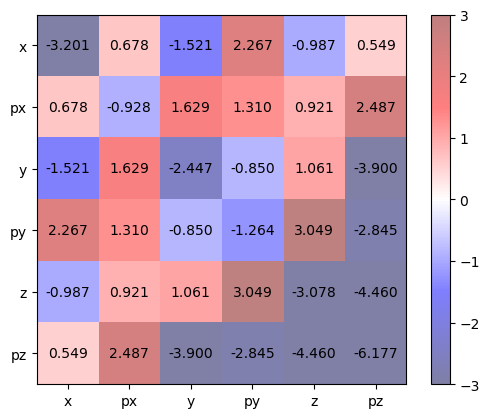

In [12]:
np.set_printoptions(precision=2, suppress=True)
show_cov_stats(pars, gt, beam_fraction=1.0)